In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from mnist import load_mnist
train, validation, test = load_mnist()

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


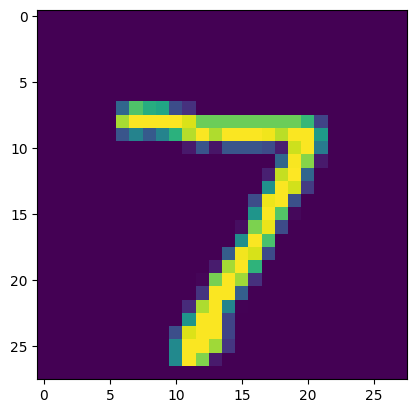

In [ ]:
plt.imshow(test[0][0])


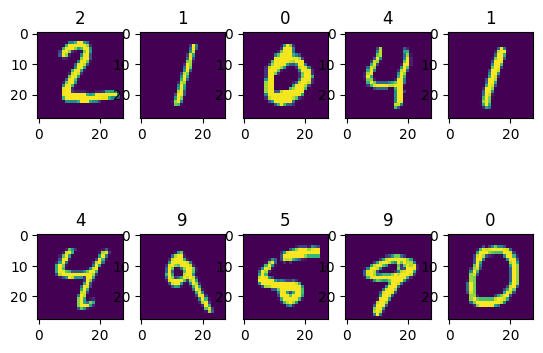

In [ ]:
for i in range(1, 11):
  plt.subplot(2, 5, i)
  plt.imshow(test[0][i])
  plt.title(test[1][i])

In [ ]:
class my_PCA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.mean = None
        self.eigenvectors = None
        self.eigenvalues = None

    def fit(self, X):
        # Шаг 1: Центрирование данных
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Шаг 2: Вычисление ковариационной матрицы
        cov_matrix = X_centered.T @ X_centered

        # Шаг 3: Вычисление собственных значений и векторов
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors
        return eigenvalues

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.eigenvectors[:, :self.n_components])

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [ ]:
X = np.concatenate([train[0], validation[0], test[0]])
y = np.concatenate([train[1], validation[1], test[1]])
X = np.reshape(X, (-1, 784)).astype(np.float32)

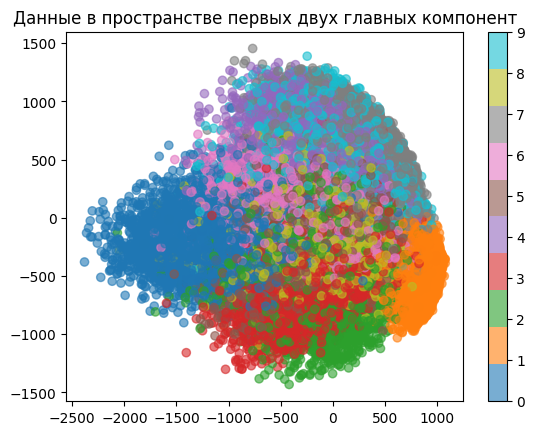

In [ ]:

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применение PCA
pca = my_PCA(n_components=2)
eigval = pca.fit(X_train)
X_pca = pca.fit_transform(X_train)

# Визуализация данных в пространстве главных компонент
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='tab10', alpha=0.6)
plt.colorbar()
plt.title('Данные в пространстве первых двух главных компонент')
plt.show()

Далее изменем количество данных чтобы долго не ждать обработки команд.
Так же заметим что классы (фв координатах первых 2х компонент) не разделимы линейно из-за большого количества пересечений

In [ ]:
data_limit = 2000

if data_limit is not None and data_limit < X.shape[0]:
    # Используем только часть данных для ускорения вычислений
    X = X[:data_limit]
    y = y[:data_limit]

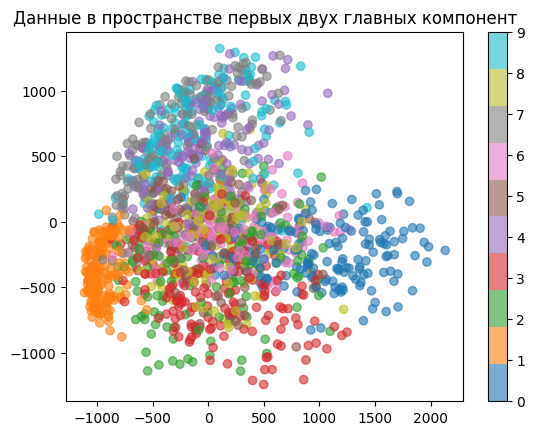

In [ ]:

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применение PCA
pca = my_PCA(n_components=2)
eigval = pca.fit(X_train)
X_pca = pca.fit_transform(X_train)

# Визуализация данных в пространстве главных компонент
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='tab10', alpha=0.6)
plt.colorbar()
plt.title('Данные в пространстве первых двух главных компонент')
plt.show()

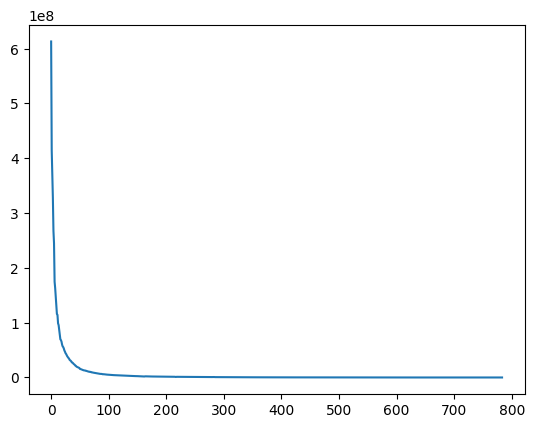

In [ ]:
plt.plot(eigval)

0.6221569


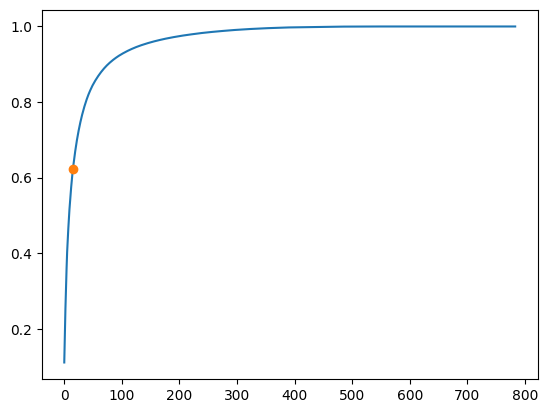

In [ ]:
cumsum = np.cumsum(eigval)
sum = cumsum/np.sum(eigval)
plt.plot(sum)
plt.plot(15, sum[15], marker = 'o')
print(sum[15])

In [ ]:
class my_kNN:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            nearest_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_labels = self.y_train[nearest_indices]
            unique, counts = np.unique(nearest_labels, return_counts=True)
            predictions.append(unique[np.argmax(counts)])
        return np.array(predictions)

In [ ]:
# Обучение kNN на исходных данных
knn = my_kNN(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность kNN на исходных данных: {accuracy:.2f}')

Точность kNN на исходных данных: 0.90


In [ ]:

# # Подбор оптимальных параметров для kNN с PCA
# best_accuracy = 0
# best_n_components = 0
# best_n_neighbors = 0

# # Ограничиваем диапазон поиска для ускорения вычислений
# n_components_range = range(1, min(65, X.shape[1] + 1))
# n_neighbors_range = range(1, min(31, len(X_train) + 1))

# for n_components in n_components_range:
#     pca = my_PCA(n_components=n_components)
#     X_train_pca = pca.fit_transform(X_train)
#     X_test_pca = pca.transform(X_test)

#     for n_neighbors in n_neighbors_range:
#         knn = my_kNN(n_neighbors=n_neighbors)
#         knn.fit(X_train_pca, y_train)
#         y_pred_pca = knn.predict(X_test_pca)
#         accuracy = accuracy_score(y_test, y_pred_pca)

#         if accuracy > best_accuracy:
#             best_accuracy = accuracy
#             best_n_components = n_components
#             best_n_neighbors = n_neighbors

# print(f'Лучшая точность: {best_accuracy:.2f}')
# print(f'Оптимальное число компонент: {best_n_components}')
# print(f'Оптимальное число соседей: {best_n_neighbors}')